# Qiskit 

## Introduction

The open-source Qiskit software development kit (SDK) was created by IBM with the goal of being used with quantum computers and simulations. It offers programmes and libraries for developing, assembling, running, and communicating with quantum simulators and hardware. The abbreviation Qiskit refers for "Quantum Information Science Kit."

## Key components and features of Qiskit include:

1. Circuit Design: Using a Python-based interface, Qiskit enables you to design quantum circuits. The definition of gates, qubits, and operations allows for the gradual construction of quantum circuits.

2. Quantum Simulators: Qiskit offers a number of simulators that let you model how quantum circuits would operate on conventional computers. Prior to putting quantum algorithms to use on genuine quantum hardware, these simulators are helpful for testing and troubleshooting quantum algorithms.

3. Quantum Hardware Interface: Qiskit also provides cloud-based connectivity to IBM's actual quantum hardware. You may test your quantum circuits on genuine quantum hardware, including superconducting qubit-based computers, and watch how your algorithms behave in practise.

4. A variety of quantum techniques, including Grover's search algorithm and Shor's factoring algorithm, are implemented in Qiskit. These algorithms demonstrate some of the possible benefits of quantum computing over traditional computing.

5. Quantum circuits frequently need to be converted into a format that can be run on particular quantum hardware. This is done using quantum compilers. The compiler tools provided by Qiskit help you optimise and map your high-level circuits to the qubits and gates of the intended device.

6. Analysis and visualisation tools are provided by Qiskit for the visualisation of quantum circuits, states, and outcomes. Users may use this to learn how their quantum programmes behave and troubleshoot any problems.

7. Quantum computers are intrinsically noisy because of decoherence and various types of inaccuracy, among other things. The tools provided by Qiskit allow users to model and analyse various noise sources and create methods for error-mitigation.

8. Community and Education: The community of researchers, teachers, and enthusiasts on Qiskit is sizable and vibrant. It provides instructional materials, tutorials, and documentation to assist beginners in learning about quantum programming and computing.

A variety of quantum backends, including simulators, actual quantum hardware, and others, are supported by Qiskit. This adaptability enables algorithm developers to test and evaluate their algorithms' performance across many platforms.

## Basic uses of Qiskit:

### Example 1: Create and Simulate a Quantum Circuit

In [5]:
from qiskit import QuantumCircuit, BasicAer, execute

# Create a quantum circuit with one qubit
circuit = QuantumCircuit(1, 1)  # 1 qubit, 1 classical bit

# Apply a Hadamard gate to the qubit
circuit.h(0)

# Measure the qubit and map it to the classical bit
circuit.measure(0, 0)

# Simulate the circuit using the qasm simulator
simulator = BasicAer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1024)
result = job.result()

# Get and print the measurement counts
counts = result.get_counts(circuit)
print(counts)


{'1': 515, '0': 509}


### Example 2: Visualize Quantum States

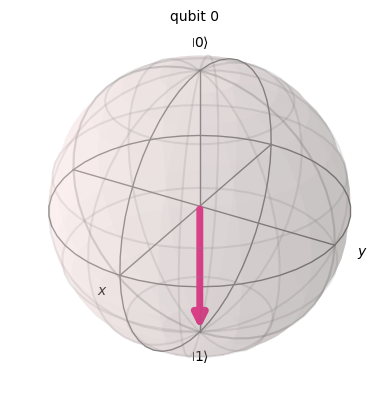

In [6]:
from qiskit.visualization import plot_bloch_multivector
from qiskit import QuantumCircuit, BasicAer, execute

# Create a quantum circuit with one qubit
circuit = QuantumCircuit(1)

# Apply an X gate to the qubit
circuit.x(0)

# Simulate the circuit using the statevector simulator
simulator = BasicAer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
statevector = job.result().get_statevector()

# Visualize the statevector using the Bloch sphere
plot_bloch_multivector(statevector)


### Example 3: Create and Simulate a quantum circuit that prepares a Bell state

Quantum Circuit:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 
Statevector:
[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
Measurement Results:
{'11': 498, '00': 502}


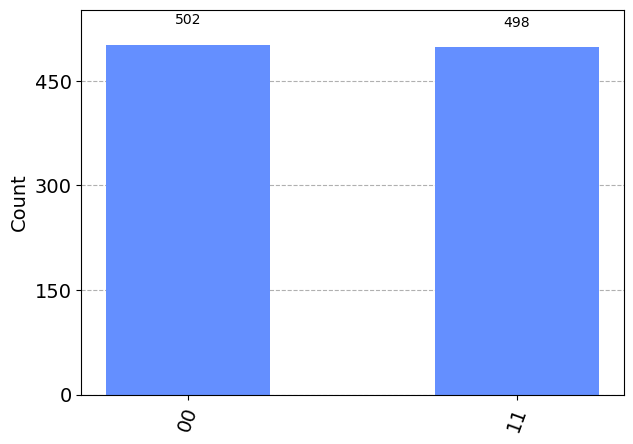

In [2]:
# Import necessary modules from Qiskit
import numpy as np
from qiskit import QuantumCircuit, transpile, assemble, BasicAer
from qiskit.visualization import plot_bloch_multivector, plot_histogram

# Step 1: Create a quantum circuit with two qubits
qc = QuantumCircuit(2, 2)  # 2 qubits, 2 classical bits

# Step 2: Add gates to the circuit
qc.h(0)  # Apply a Hadamard gate to qubit 0
qc.cx(0, 1)  # Apply a CNOT gate (controlled-X) with qubit 0 as control and qubit 1 as target

# Step 3: Measure qubits to classical bits
qc.measure([0, 1], [0, 1])  # Measure qubit 0 into classical bit 0, and qubit 1 into classical bit 1

# Step 4: Visualize the circuit
print("Quantum Circuit:")
print(qc)

# Step 5: Simulate the circuit using the statevector simulator
simulator = BasicAer.get_backend('statevector_simulator')
compiled_circuit = transpile(qc, simulator)
job = assemble(compiled_circuit, shots=1)
result = simulator.run(job).result()
statevector = result.get_statevector()

# Step 6: Visualize the statevector on the Bloch sphere
print("Statevector:")
print(statevector)
plot_bloch_multivector(statevector)

# Step 7: Simulate the circuit using the qasm simulator for measuring outcomes
simulator = BasicAer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
job = assemble(compiled_circuit, shots=1000)  # Simulate 1000 measurement shots
result = simulator.run(job).result()
counts = result.get_counts()

# Step 8: Visualize the measurement outcomes using a histogram
print("Measurement Results:")
print(counts)
plot_histogram(counts)


### Example 4: Using Qiskit to implement the Quantum Teleportation protocol

Quantum Circuit:
     ┌───┐          ┌───┐┌─┐ ░            
q_0: ┤ X ├───────■──┤ H ├┤M├─░───────■────
     ├───┤     ┌─┴─┐└┬─┬┘└╥┘ ░       │    
q_1: ┤ H ├──■──┤ X ├─┤M├──╫──░───■───┼────
     └───┘┌─┴─┐└───┘ └╥┘  ║  ░ ┌─┴─┐ │ ┌─┐
q_2: ─────┤ X ├───────╫───╫──░─┤ X ├─■─┤M├
          └───┘       ║   ║  ░ └───┘   └╥┘
c: 3/═════════════════╩═══╩═════════════╩═
                      1   0             2 
Measurement Results:
{'111': 269, '100': 262, '110': 233, '101': 236}


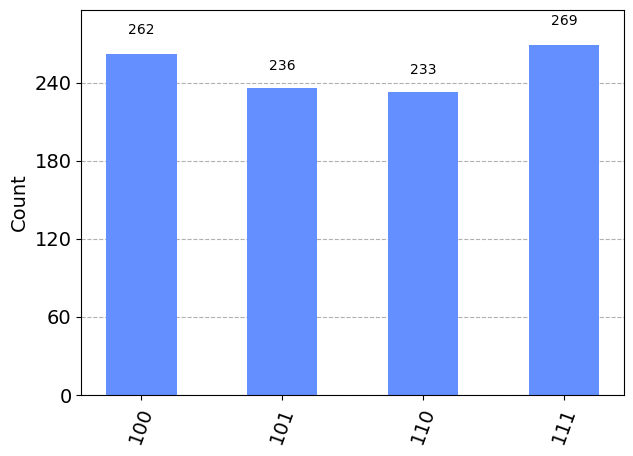

In [3]:
# Import necessary modules from Qiskit
from qiskit import QuantumCircuit, transpile, assemble, BasicAer
from qiskit.visualization import plot_bloch_multivector, plot_histogram

# Step 1: Create a quantum circuit with three qubits
qc = QuantumCircuit(3, 3)  # 3 qubits, 3 classical bits

# Step 2: Prepare the initial state to be teleported
qc.x(0)  # Apply an X gate to qubit 0 (|0> state becomes |1>)
qc.h(1)  # Apply a Hadamard gate to qubit 1 (creates superposition)
qc.cx(1, 2)  # Apply a CNOT gate with qubit 1 as control and qubit 2 as target

# Step 3: Entangle the sender's qubit and the qubit to be teleported
qc.cx(0, 1)  # Apply a CNOT gate with qubit 0 as control and qubit 1 as target
qc.h(0)  # Apply a Hadamard gate to qubit 0

# Step 4: Measure the sender's qubits
qc.measure([0, 1], [0, 1])  # Measure qubit 0 into classical bit 0, and qubit 1 into classical bit 1

# Step 5: Apply corrections to the qubit to be teleported
qc.barrier()  # Barrier to separate quantum and classical operations
qc.cx(1, 2)  # Apply a CNOT gate with qubit 1 as control and qubit 2 as target
qc.cz(0, 2)  # Apply a CZ gate with qubit 0 as control and qubit 2 as target

# Step 6: Measure the teleported qubit
qc.measure(2, 2)  # Measure qubit 2 into classical bit 2

# Step 7: Visualize the circuit
print("Quantum Circuit:")
print(qc)

# Step 8: Simulate the circuit using the qasm simulator
simulator = BasicAer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
job = assemble(compiled_circuit, shots=1000)  # Simulate 1000 measurement shots
result = simulator.run(job).result()
counts = result.get_counts()

# Step 9: Visualize the measurement outcomes using a histogram
print("Measurement Results:")
print(counts)
plot_histogram(counts)
